In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import sys
sys.path.append("../../")
from src.util import operators
from src.util.stochastic_expectation_value import compute_stochastic_expectation_value_nonlinear as compute_exp_val
from src.homps import homps
from src.hops import hops_trotter_simple
from src.hops import hops_rk_simple

In [5]:
# parameters for the bath correlation functions
g = np.array([2])
w = np.array([0.5+2j])
# time
duration = 50
# operators
sigma_x, sigma_z, eye = operators.generate_physical_operators()
h = operators.generate_spin_boson_hamiltonian()
L = sigma_z

Without noise:


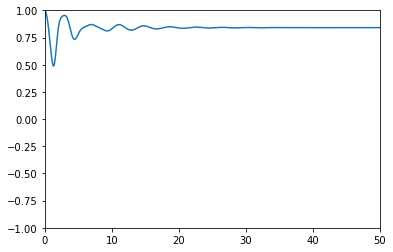

With noise:


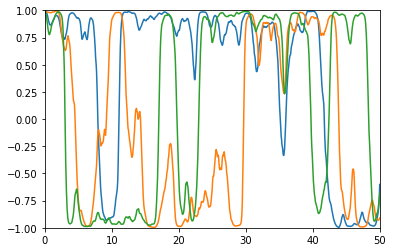

In [6]:
N_steps = 1000
N_trunc = 8

print("Without noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, method='RK4')
psis = hierarchy.compute_realizations(1)
sigma_zs = compute_exp_val(psis, sigma_z)
plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

print("With noise:")
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=True, method='RK4')
for i in range(3):
    psis = hierarchy.compute_realizations(1)
    sigma_zs = compute_exp_val(psis, sigma_z)
    plt.plot(np.linspace(0, duration, N_steps), sigma_zs, "-")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

In [20]:
N_steps = 1000
N_trunc = 16

In [21]:
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=True, method='RK4')

In [22]:
psis_100 = hierarchy.compute_realizations(N_samples=100, progressBar=tqdm)

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
sigma_zs_100 = compute_exp_val(psis_100, sigma_z)
#sigma_zs_1000 = compute_exp_val(psis_1000, sigma_z)

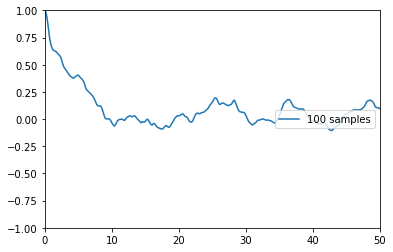

In [24]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_100, label="100 samples")
#plt.plot(np.linspace(0, duration, N_steps), sigma_zs_1000, label="1000 samples")
plt.legend(loc="right")
plt.ylim(-1, 1)
plt.xlim(0, duration)
plt.show()

# Fine-tuned comparison

In [28]:
N_steps = 1000
N_trunc = 20
chimax = 10
epsilon = 0
N_krylov = 20

In [29]:
hops = hops_trotter_simple.HOPS_Simple_Trotter(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, N_krylov=N_krylov)
hierarchy = homps.HOMPS_Engine(g, w, h, L, duration, N_steps, N_trunc, linear=False, use_noise=False, chimax=chimax, epsilon=epsilon, N_krylov=N_krylov, method='RK4')

In [30]:
#zts = hops.generator.sample_process()
zts = None

In [31]:
psis_hops = hops.compute_realizations(1, zts_debug=zts)
psis_homps = hierarchy.compute_realizations(1, zts_debug=zts)

In [32]:
sigma_zs_hops = compute_exp_val(psis_hops, sigma_z)
sigma_zs_homps = compute_exp_val(psis_homps, sigma_z)

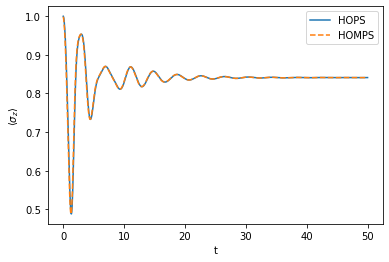

In [33]:
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_hops, label="HOPS")
plt.plot(np.linspace(0, duration, N_steps), sigma_zs_homps, "--", label="HOMPS")
plt.ylabel(r"$\left\langle\sigma_z\right\rangle$")
plt.xlabel("t")
plt.legend()
plt.show()